In [ ]:
from google.colab import files
uploaded = files.upload()

Saving StudentMarkSheet.csv to StudentMarkSheet.csv
Saving CatData.csv to CatData (1).csv


Question no.1 code is given below:



In [ ]:
def check_input(test):
    rows = len(test)
    cols = len(test[0])
    for r in range(rows):
        for c in range(cols):
            if type(test[r][c]) == str:
                return False
            elif c + 1 < cols:
             if test[r][c] == test[r][c+1]:
                return False
    for c in range(cols):
        for r in range(rows):
            if r+1 < rows:
             if test[r][c] == test[r+1][c]:
                return False
    return True

test1 = [[1, 2, 3],
        [2, 3, 1],
        [3, 1, 2]]

test2 = [[1, 2, 3, 4],
        [2, 3, 1, 3],
        [3, 1, 2, 3],
        [4, 4, 4, 4]]

test3 = [['a', 'b', 'c'],
        ['b', 'c', 'a'],
        ['c', 'a', 'b']]

print(check_input(test1)) # must return true
print(check_input(test2)) # must return false
print(check_input(test3)) # must return false

True
False
False


Question no.2 and Question no.3 code is given below:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Student name  200 non-null    object 
 1   Exam name     199 non-null    object 
 2   Exam date     200 non-null    object 
 3   Marks         197 non-null    float64
dtypes: float64(1), object(3)
memory usage: 6.4+ KB

Number of rows:  200
Number of rows containing null data:  4
Number of rows after NA rows are removed:  196

      Student name    Exam name  Marks
0    James Walker      Biology   31.0
42   James Walker    Chemistry   61.0
71   James Walker  Mathematics   23.0
150  James Walker      Physics  100.0
180  James Walker    Sociology   73.0

Total of Biology Tests:  38 
Sigma of Biology:  1820.0

Average of Biology:  47.89473684210526

Total of Chemistry Tests:  26 
Sigma of Chemistry:  1315.0

Average of Chemistry:  50.57692307692308

Total of Physics Tests:  21 
Sigma of Physics:  

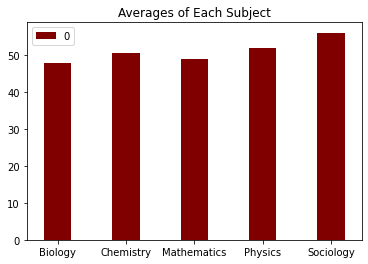

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
# Question 2:
# Part-A:
data = pd.read_csv(io.BytesIO(uploaded["StudentMarkSheet.csv"]))
data.info()
# Part-B:
print("\nNumber of rows: ", data.shape[0])
length = data.shape[0]
data = data.dropna()
no_of_nulls = length - data.shape[0]
print("Number of rows containing null data: ", no_of_nulls)
print("Number of rows after NA rows are removed: ", data.shape[0])
# Part-C:
james = data.loc[data["Student name"] == "James Walker", ("Student name", "Exam name", "Marks")]
print("\n", james)
# Question 3:
# Part-A:
biology = data.loc[data["Exam name"] == "Biology", "Marks"]
n_biology = biology.count()
S_biology = biology.sum()
a_biology = S_biology / n_biology
print("\nTotal of Biology Tests: ", n_biology, "\nSigma of Biology: ", S_biology)
print("\nAverage of Biology: ", a_biology)
chemistry = data.loc[data["Exam name"] == "Chemistry", "Marks"]
n_chemistry = chemistry.count()
S_chemistry = chemistry.sum()
a_chemistry = S_chemistry / n_chemistry
print("\nTotal of Chemistry Tests: ", n_chemistry, "\nSigma of Chemistry: ", S_chemistry)
print("\nAverage of Chemistry: ", a_chemistry)
physics = data.loc[data["Exam name"] == "Physics", "Marks"]
n_physics = physics.count()
S_physics = physics.sum()
a_physics = S_physics / n_physics
print("\nTotal of Physics Tests: ", n_physics, "\nSigma of Physics: ", S_physics)
print("\nAverage of Physics: ", a_physics)
maths = data.loc[data["Exam name"] == "Mathematics", "Marks"]
n_maths = maths.count()
S_maths = maths.sum()
a_maths = S_maths / n_maths
print("\nTotal of Mathematics Tests: ", n_maths, "\nSigma of Mathematics: ", S_maths)
print("\nAverage of Mathematics: ", a_maths)
socio = data.loc[data["Exam name"] == "Sociology", "Marks"]
n_socio = socio.count()
S_socio = socio.sum()
a_socio = S_socio / n_socio
print("\nTotal of Sociology Tests: ", n_socio, "\nSigma of Sociology: ", S_socio)
print("\nAverage of Sociology: ", a_socio)
# Part-B:
marks = np.array([a_biology, a_chemistry, a_maths, a_physics, a_socio])
subjects = np.array(["Biology", "Chemistry", "Mathematics", "Physics", "Sociology"])
df = pd.DataFrame(marks, index=subjects)
df.plot.bar(rot=0, color='maroon', width=0.4)
plt.title("Averages of Each Subject")
plt.show()


Question no.4 code is below: 

Independent variable is: Tail Length (cm)

Dependent variable is: Mass (kg)

Data:  342
Train:
      Tail Length (cm)  Mass (kg)
0                18.1      3.750
1                18.6      3.800
2                19.5      3.250
3                19.3      3.450
4                19.0      3.650
..                ...        ...
268              22.2      6.000
269              21.4      4.925
270              21.5      4.850
271              22.2      5.750
272              21.2      5.200

[273 rows x 2 columns]
Test:
      Tail Length (cm)  Mass (kg)
273              21.3      5.400
274              19.2      3.500
275              19.6      3.900
276              19.3      3.650
277              18.8      3.525
..                ...        ...
337              20.7      4.000
338              20.2      3.400
339              19.3      3.775
340              21.0      4.100
341              19.8      3.775

[69 rows x 2 columns]
Slope after using regression model:  [0.48913766]
Intercept after using regression model:  [-5.57328662]


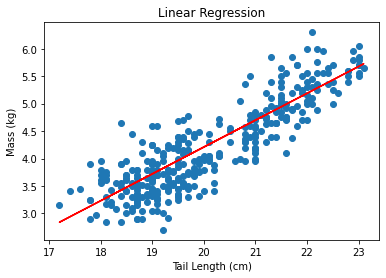

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import io
# Part A:
df = pd.read_csv(io.BytesIO(uploaded["CatData.csv"]))
df = df.dropna()  # preproccessing to remove any null entries
# Part B:
df = df[["Tail Length (cm)", "Mass (kg)"]]  # x: Tail Length(cm) and y: Mass(kg)
num = int(len(df)*0.8)
train = df[:num]
test = df[num:]
print("Data: ", len(df))
print("Train:\n", train)
print("Test:\n", test)
#Part C:
regr = linear_model.LinearRegression()
train_x = np.array(train[["Tail Length (cm)"]])
train_y = np.array(train[["Mass (kg)"]])
regr.fit(train_x, train_y)
coefficients = regr.coef_  # slope
intercept = regr.intercept_  # y-intercept
print("Slope after using regression model: ", coefficients[0])
print("Intercept after using regression model: ", intercept)
#Part D:
plt.scatter(df["Tail Length (cm)"], df["Mass (kg)"])
plt.plot(train_x, coefficients * train_x+intercept, color='red')
plt.title("Linear Regression")
plt.xlabel("Tail Length (cm)")
plt.ylabel("Mass (kg)")
plt.show()
